In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of Y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of Y_test: (10000,)


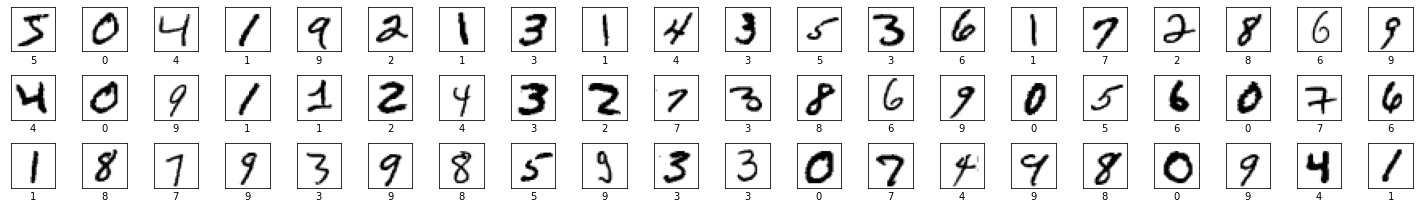

In [3]:
ROWS = 3
COLS = 20
i = 0
plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_train[i], cmap=plt.cm.gray_r)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [4]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

In [5]:
# X_train = X_train.reshape(-1, 28, 28, 1)
# X_test = X_test.reshape(-1, 28, 28, 1)

In [6]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [7]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [8]:
# model.compile(
#   optimizer='SGD', 
#   loss='sparse_categorical_crossentropy', 
#   metrics=['accuracy']
# )

In [9]:
# model.compile(
#   optimizer='RMSProp', 
#   loss='sparse_categorical_crossentropy', 
#   metrics=['accuracy']
# )

In [10]:
h = model.fit(x=X_train, y=Y_train, epochs=4, validation_split=0.2, batch_size=32)

Epoch 1/4
1500/1500 [==============================] - 34s 21ms/step - loss: 0.4854 - accuracy: 0.8448 - val_loss: 0.1217 - val_accuracy: 0.9608
Epoch 2/4
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0740 - accuracy: 0.9768 - val_loss: 0.0548 - val_accuracy: 0.9837
Epoch 3/4
1500/1500 [==============================] - 29s 20ms/step - loss: 0.0504 - accuracy: 0.9836 - val_loss: 0.0729 - val_accuracy: 0.9802
Epoch 4/4
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0393 - accuracy: 0.9873 - val_loss: 0.0498 - val_accuracy: 0.9864


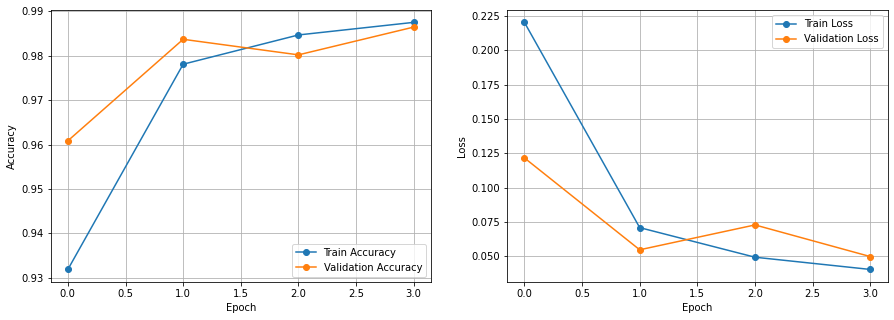

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(h.history['accuracy'], 'o-', label='Train Accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(h.history['loss'], 'o-', label='Train Loss')
plt.plot(h.history['val_loss'], 'o-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [12]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 2s 6ms/step - loss: 0.0448 - accuracy: 0.9864

Test Accuracy: 0.9864000082015991

Test Loss: 0.044768474996089935


In [13]:
predictions = model.predict(X_test)

In [14]:
predictions[15]

array([7.3126926e-06, 1.6521737e-07, 1.4337348e-06, 7.2876574e-04,
       2.2065694e-06, 9.9914789e-01, 7.4875905e-05, 1.4036655e-05,
       5.6877921e-06, 1.7563396e-05], dtype=float32)

In [15]:
np.argmax(predictions[15])

5

In [16]:
X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)

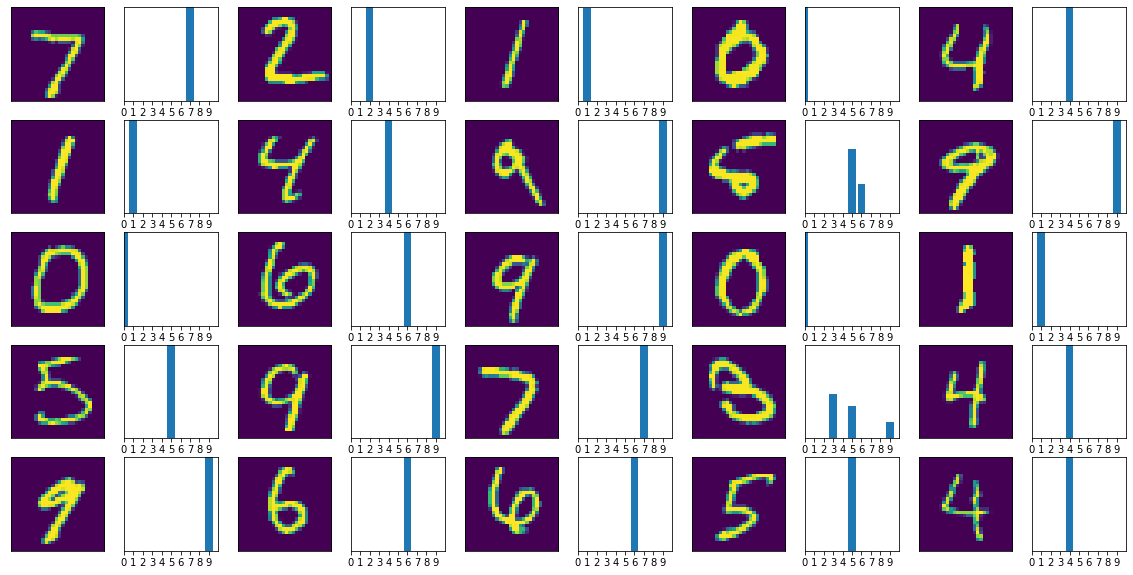

In [17]:
rows = 5
cols = 5
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
plt.show()